# Notebook 1 - importing and manipulating tabulated data 
-------------------------------------------------------------------------------------------------------

## Table of Content <a id='toc'></a>


1. **[Reading the data](#reading)**  
    1.1. [The basics](#reading.1)  
    1.2. [Header or not header, that is the question](#reading.2)  
    1.3. [Setting up the row index](#reading.3)  
    1.4. [Other options](#reading.4)  
    1.5. [More formats](#reading.5)  
    <br>

2. **[Data manipulation](#manip)**  
    2.1. [First contact with the data](#manip.1)  
    2.2. [Accessing specific parts of the data - rows and columns](#manip.2)  
    2.3. [Accessing specific parts of the data - selection](#manip.3)  
    2.4. [Operations on columns](#manip.4)  
    2.4. [Adding/removing and combining columns and rows](#manip.5)  
    <br>

3. **[Writing DataFrames to disk](#writing)**
   <br>

**Additional Material - [Tips and tricks](#annex)**  
  * Annex 1 - [Applying custom functions to a DataFrame](#annex.1)  
  * Annex 2 - [Sorting operations on dataframes](#annex.2)  
  * Annex 3 - [Merge and join DataFrames](#annex.2)  
  * Annex 4 - [Wide and long format](#annex.2)  
    

<br>
<br>

## Introduction

The basis of any statistical analysis is the underlying data, and very often data are stored in **tabular format**:
 * Each **line** corresponds to an observation (individual, sample, ... ).
 * Each **column** correspond to a measured variable (height, sex, gene expression, ... ).

In python, the most popular module to read and manipulate tabulated data is certainly **[pandas](https://pandas.pydata.org)**, a "high-level" module designed for statistics/exploratory data analysis. A great strength of pandas is its **DataFrame** object which emulates many of the convenient behavior and syntax of its eponym counterpart in the **R** language.

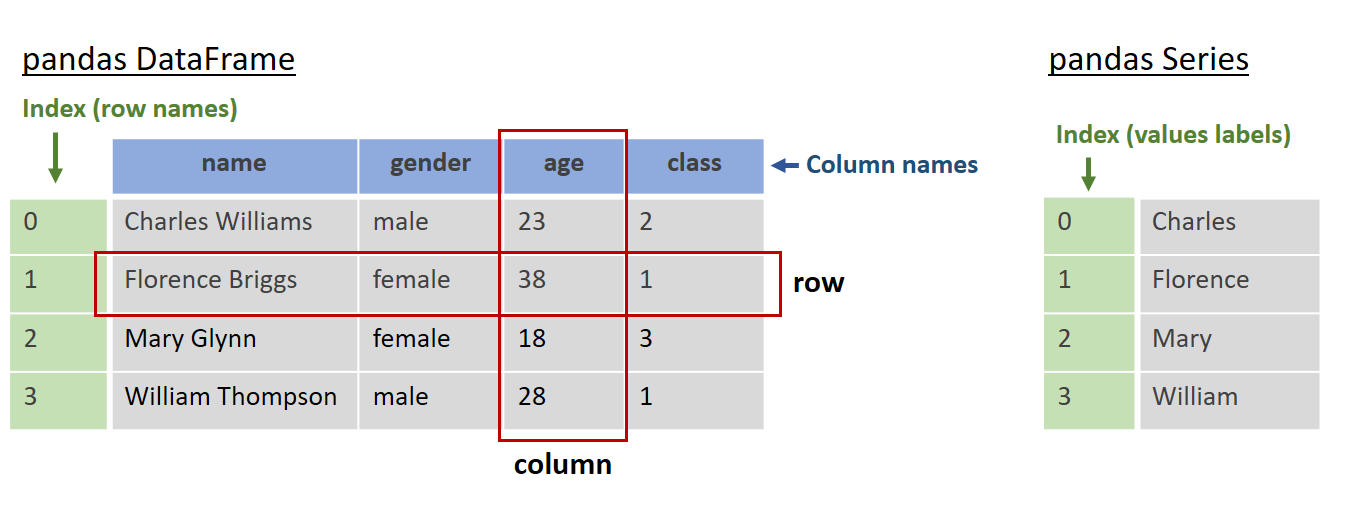

<br>

To graphically represent data, we will rely on the **[seaborn](https://seaborn.pydata.org)** library.
Seaborn is designed to work hand-in-hand with pandas DataFrame to produce **efficient data representation** from fairly simple commands. The seaborn official website proposes [very good tutorials](https://seaborn.pydata.org/tutorial.html) as well as a [gallery](https://seaborn.pydata.org/examples/index.html) with associated code to get you started quickly.

<br>

### Loading the pandas and seaborn modules

By convention, pandas is imported as **`pd`** and seaborn as **`sns`**:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("All modules loaded successfully!")

> Note: if you are missing some of the above modules, you should install them.
>
>    * Installation with **pip**: `pip install --user pandas matplotlib seaborn numpy` 
>    * Installation with **conda**: `conda install -c anaconda pandas matplotlib seaborn numpy`

<br>

Making the plotted labels a bit bigger for presentation with a projector... you do **not need to run this cell**.

In [ ]:
import matplotlib as mpl

font = {"family": "DejaVu Sans",
        "weight": "bold",
        "size"  : 16}

mpl.rc("font", **font)

<br>
<br>

## 1. Reading tabulated data <a id='reading'></a> 

### 1.1 The basics <a id='reading.1'></a> 

In most cases, the data you want to work with is stored in a file on disk. The very first step is therefore to **load the data as a DataFrame**.

**`pd.read_table(<file path and name>)`** is the generalist pandas function to read tabulated data files. Aside from the name and path of the file to read, it supports some useful optional arguments:
* **`sep`**: the separator between columns in the file (by default `"\t"`, a tab).
* **`header`**: the row number(s) to use as the column names. By default the first line of a file is
  used as header. Use `header=None` if the file does not contain column names.
* **`skiprows`**: allows to skip the specified rows (lines of the file) during import. This can be either
  a sequence of the lines to skip (0-indexed), or an integer number indicating how many lines to skip
  at the start of the file.

> You can learn (much) more using `help(pd.read_table)` or the
  [online help](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html).

> By default, python is searching for files in your current working directory. If the file you wish to load
  is not there, you will need to specify its path, either absolute or relative to the working directory.

<br>

Let's now try to load the `data/titanic.csv` file. As its name suggest, this file contains the popular dataset of the ill-fated [Titanic](https://en.wikipedia.org/wiki/Titanic) passengers, traveling from England to New York in April 1912. The data file is named `titanic.csv` and, as its extension suggests, contains **C**omma-**S**eparated **V**alues.

> Note the usage of the **`head()`** method of DataFrame to display only its first 5 lines.

In [ ]:
import pandas as pd

df = pd.read_table("data/titanic.csv") 
df.head()                                 # By default, head() returns the first 5 lines of a DataFrame.

This does not look so great...

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 1
* Try to fix the cell just above (the loading of `data/titanic.csv`) by looking at the option(s) of
  the **`pd.read_table()`** function.
* **If you have time:** try to find a pandas function that will read CSV files by default, i.e.
  without having to pass any additional option. **Hint:** have a look at the
  [input/output functions](https://pandas.pydata.org/pandas-docs/stable/reference/io.html).
    
<div>


<br>
<br>
<br>

<center><b>Spoiler alert</b>: do not scroll or be spoiled!</center>

-----

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

As you have just seen, `pd.read_table()` expects the input data to be **tab-delimited** (by default). Since this is not the case of the `titanic.csv` file, each line was treated as a single field (column), thus creating a DataFrame with a single column.

As implied by its `.csv` extension (for "**C**omma-**S**eparated **V**alues"), the `titanic.csv` file contains **comma-delimited** values.  
To load a CSV file, we can either:
* Specify the separator value via the **`sep`** argument: `pd.read_table(<file name>, sep=",")`.
* Use **`pd.read_csv()`**, pandas' dedicated function to load CSV files that uses commas as default separator.

<br>

Let's reload the file with the proper column/field separator:

In [ ]:
df = pd.read_table("data/titanic.csv", sep=",") 
# Alternatively: df = pd.read_csv("data/titanic.csv", sep=",")

df.head()

<br>
<br>

[Back to ToC](#toc)

## 1.2 Header or not header, that is the question <a id='reading.2'></a>


Another important aspect of reading data is whether your dataset has a header or not. 
By default, **`pd.read_table()` expects the first line to be a header**, unless you either:
 * Use the argument **`header=None`**.
 * Specify column names using the **`names`** argument.

<br>

Let's try to load a dataset that does not have any header:  
> Note: as illustrated in the cell below, `head()` can print any number of lines by passing a
  value to it - here we pass the value `3` to print the first 3 lines of the data frame.

In [ ]:
df = pd.read_table("data/titanic_no_header.csv", sep=",") 
df.head(3)

As you can see, the **values in the first line were used as column names**... this is not ideal.

Let's correct this:

In [ ]:
df = pd.read_table("data/titanic_no_header.csv", sep=",", header=None) 
df.head(3)

Much better! 

Let's go one step further and **assign our own column names** using the `names` argument of `pd.read_table()`:

In [ ]:
df = pd.read_table(
    "data/titanic_no_header.csv",
    sep=",", 
    names = ["name", "column2", "age", "column4", "blip", "bloop", "spam", "eggs"]
)
df.head(3) 

As you can see, we can choose our own names, whether they make sense or not.  

> Note: it is important that the length of the sequence passed to `names` **matches the number of columns in the file** (otherwise pandas will consider columns on the left as being part of the index, i.e. row names).


<br>

**Column names** can be accessed or modified using the **`.columns`** attribute of DataFrames.

In [ ]:
print("Column names of 'df' data frame:", list(df.columns))

df.columns = ("Name", "Sex", "Age", "Pclass", "Survived", "Family", "Fare", "Embarked")
df.head()

<br>
<br>

[Back to ToC](#toc)

## 1.3 Setting the row index (row names) <a id='reading.3'></a>

Now that we learned to change column names, let's see how to modify **row names**, which are called the **index**.

> Note: not all dataset need a custom index. Oftentimes the default index (numbers starting from 0 
  that correspond to line positions) is enough. It can often also be advantageous to have the index
  correspond to row positions.

There are several options available to modify the index that we will illustrate below.

<br>

### 1.3.1 Input file contains row names (file has one less column names than data fields)

Depending on how the data file was produced, it may already contain row names. Let's see an example of this with the `data/titanic_implicit_index.csv` file. First we will display the "raw" content of our file:

In [ ]:
with open("data/titanic_implicit_index.csv", mode="r") as f:
    for x in range(5):
        print(f.readline().strip())

As can be seen above, the 1st line of the file contains 8 elements, while all other lines contain 9 elements! This is because in this file, the first field are row names rather than an actual column. Since row names have no column name, the first line of the file has one less field than the remaining lines.

> Note: if you are using a Linux or MacOS machine, you could also use the following one-liner shell command
> to display the first 5 lines of a plain text file:
>
> `!head -n 5 data/titanic_implicit_index.csv`
>
> The leading **`!`** is a special Jupyter Notebook syntax that indicates a call to a shell
> program (here `head`). This allows you to run shell commands from a Jupyter Notebook.

<br>

Let's see how pandas handles this data file:

In [ ]:
df = pd.read_csv("data/titanic_implicit_index.csv") 
df.head(3)

In [ ]:
df.index[:5]  # Access the index directly. With [:5], we only select the first 5 elements (values 0 to 4).

> When pandas detects this configuration - one more field than column names (i.e. one less value in the
  first line than in the remaining lines) - it **automatically uses the first, nameless, column as index**.

<br>

### 1.3.2 Using `index_col` to manually specify the index

Pandas can be instructed to use a specific column of an input file as index via the **`index_col`** argument of `pd.read_table()`. The index column can be indicated either:
* By position (*reminder:* column indexing is zero-based, the index of the first column is 0, not 1).
* By name.

<br>

**Examples:**

In [ ]:
# Index column specified by position: 0 = 1st column.
df = pd.read_csv("data/titanic.csv", index_col=0)
df.head(3) 

In [ ]:
# Index column specified by name.
df = pd.read_csv("data/titanic.csv", index_col="Name")
df.head(3)

In [ ]:
df.columns  # Just to make sure that "Name" is not a column.

> *Notes:*
>  * Removing the name of the index ("Name" in the example above) can be done
>    with: `df.index.name = None`
>  * Pandas also has a system of multiple, hierarchized indexing. This is, however,
>    a more specialized and advanced feature.

<br>
<br>

[Back to ToC](#toc)

## 1.4 Other `pd.read_table()` options <a id='reading.4'></a>

**`pd.read_table()`** has a large number of optional arguments.
We cannot go though all of them, but here are a few which may be of interest to you:
* `true_values`/`false_values`, each a list. A must if you have columns encoded with "yes"/"no" labels.
* `na_values`: takes a list. Allows you to define your own NA values. Ideal when your NAs are
  encoded as something unusual (eg, `.`,` `,`-9999`,...).
* `parse_dates`/`infer_datetime_format`/`date_parser`: options to help you handle date parsing, which can
  otherwise be a nightmare - [more on this here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).
* `compression`: your data is in a compressed format (zip, gzip, ...)? Not a problem!


<br>
<br>

[Back to ToC](#toc)

## 1.5 Reading other tabulated file formats <a id='reading.5'></a>

As you might expect, pandas is not limited to text, csv/tsv-like files. It can read/write from/to many other file formats:

* `pd.read_excel()`
* `pd.read_json()`
* `pd.read_sql()` 
* ... see [here for an exhaustive list of pandas reader and writer functions](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).



In [ ]:
genbank_df = pd.read_json("data/genbank.sub.ndjson", lines=True)
genbank_df.head(3)

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 2
* Read the file `data/pbmc_data.countMatrix.50.txt.zip` as a DataFrame. Determine which is the separator,
  and decide whether there is a header and/or an index column.

<div>



<br>
<br>
<br>

[Back to ToC](#toc)

# 2. Data manipulation <a id='manip'></a>
---------------------------------

Now that you know (almost) everything about loading files as a `DataFrame`, let's see what we can actually do with these!

<br>

## 2.1 First contact with the data <a id='manip.1'></a>

Gathering basic information about a DataFrame is fairly easy, and we will illustrate this with the titanic data:

In [ ]:
# Loading the titanic dataset as a DataFrame.
df = pd.read_csv("data/titanic.csv")
df.head(3)

<br>

* **`df.shape`** returns a tuple with the numbers of rows and columns: `(row_count, col_count)`.

In [ ]:
df.shape

In [ ]:
row_count, col_count = df.shape                               # Unpacking of a tuple.
print('row count:', row_count, '\ncolumn count:', col_count)

<div class="alert alert-block alert-info">
    
### Additional material: values unpacking

Value unpacking is frequently used in python to assign values to multiple variables in a single statement:
* Any object that is an iterable (sequence) can be unpacked.
* The number of variable to which values are assigned must match the length of the iterable.
* To unpack multiple values into a single variable (as a list), the `*var` syntax is used (see example below).

  **Examples:**
    ```py
    a, b, c = (1, 2, 3)               # Unpacking of a tuple
    print(f"a: {a}, b: {b}, c: {c}")

    a, b, c = range(3)                # Unpacking works with any iterable - here a "range" object.
    print(f"a: {a}, b: {b}, c: {c}")
    ```

    ```py
    #a, b = [1, 2, 3, 4, 5]           # Raises a ValueError: the number of items to unpack
                                      # does not match the number of variables being assigned.

    a, *b = [1, 2, 3, 4, 5]           # *b collects all remaining values into a list.
    print(f"a: {a}, b: {b}")
    ```

<br>

* When calling functions, values can be unpacked into arguments or key-word arguments for
  the function by using the syntax `function(*arg)` and `function(**kwargs)`.

  **Examples:**
    ```py
    arg_values = [11, 20, 3]
    for x in range(*arg_values):
        print(x)

    kwarg_values = {"sep": "--", "end": "..."}
    print(*arg_values, **kwarg_values)           # Prints "11--20--3..."
    ```

</div>

<br>

* **Column names** can be accessed with the **`df.columns`** attribute.
* **Row names** (the index) can be accessed with the **`df.index`** attribute.

> *Note:* here the index is number-based, starting with 0 (this is the default pandas indexing).

In [ ]:
print('Column names:\n', df.columns, "\n")
print('Index (row names):\n', df.index, "\n")

print('Column names:', list(df.columns))
print('row names   :', list(df.index)[:10], "...")

<br>

* The **`df.columns`** and **`df.index`** attributes can also be used to set new values for column names
  and index labels.

In [ ]:
# Print the start of the DataFrame for reference.
df.head(3)

In [ ]:
# Change the column names to upper case.
df.columns = [x.upper() for x in df.columns]

# Change the row names.
df.index = [f"passenger_{i}" for i in df.index]
df.head(3)

> Note: here we used an **f-string** for formatting, go read the [doc](https://docs.python.org/3/tutorial/inputoutput.html) if you want to learn about them

In [ ]:
# Let's reset out changes in index and column names:
df.columns = df.columns.str.capitalize()
df.index = range(0, df.shape[0])
df.head(3)

> Note: how did we apply a `str` function to all the column names at once?  
> That is a very powerful feature of DataFrame, which we'll discuss later.

<br>

Each column of a DataFrame has an associated **data type**, which controls the operations you may perform on it. Our example DataFrame contains the following data types:
* **`object`**: catch all for text, intermixed or not with numbers.
* **`float64`** : float.
* **`int64`** : integer.

In [ ]:
print("columns types:\n", df.dtypes, sep="")  # List the type of each column in the df DataFrame.

Other types exist. The main types are :
    
 * **`object`**: catch-all type (includes strings).
 * **`int64`**: integers.
 * **`float64`**: floats.
 * **`bool`**: booleans.
 * **`datetime64`**: date and time points.
 * **`category`**: categorical data with fixed possible values.
 

To change the type of a column, the simplest is to use the `.astype` method:

In [ ]:
# Change column type from float to object.
df_copy = df.copy()
df_copy.Fare = df_copy.Fare.astype(str)

# It can then be manipulated as a string.
df_copy.Fare = '$' + df_copy.Fare
df_copy.head()

<br>

In the case of the titanic data, the passenger class is not really a number, and may be better represented as a **`category`** variable.

In [ ]:
df.Pclass = df.Pclass.astype("category")
df.Pclass.head()

**Category-specific methods** to apply to the column can then be accessed with **`.cat`**.  
For instance, we could change the labels of the categories with `.cat.rename_categories()`:

In [ ]:
df.Pclass= df.Pclass.cat.rename_categories({1: "I", 2: "II", 3: "III"})
df.Pclass.head()

> Note: [datetime64](https://pandas.pydata.org/docs/user_guide/timeseries.html) and [category](https://towardsdatascience.com/staying-sane-while-adopting-pandas-categorical-datatypes-78dbd19dcd8a) are fairly specific types, and we refer you to the provided links if you want to learn more about them.


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 3

A typical use case: you are given badly formatted data and have to curate it.

In this exercise, the badly formatted data comes in the form of a column of data (a `Series`) that contains percentages followed by a `%` sign. To generate this data, copy-paste the following line in a new code cell:

```python
percent_column = pd.Series(np.random.randint(0,100,100), dtype="str") + '%' 
```

<br>

**Your mission** is to get this column into usable usable numbers by:
* Removing the trailing `%`.
* Converting the values to integers.

<div>


<br>
<br>
<br>

[Back to ToC](#toc)

## 2.2 DataFrame subsetting - accessing specific rows and columns <a id='manip.2'></a>

### 2.2.1 Accessing single/multiples columns by name

Columns of a DataFrame can be accessed with the syntax:
* **`df[<column name>]`** or **`df.<column name>`** - to select a single column.
* **`df[[<column name>, <column name>, ... ]]`** - to select multiple columns. Note that the column names
  must be passed as a **`list`**.

In [ ]:
# (Re)Load the titanic dataset as a DataFrame and display it for reference.
df = pd.read_csv("data/titanic.csv")
df.head(3)

<br>

* Select a **single column**. This returns a pandas "Series".

In [ ]:
df["Sex"]

> *Note:* `pandas` only prints first and last 5 rows of the column to avoid clogging your screen, as well as some useful info.

Alternatively, we can also use the syntax **`df.<column name>`**

In [ ]:
df.Age.head()

<br>

* Selecting **multiple columns**. This returns a "subset/slice" of the DataFrame object.

> **WARNING:** depending on the situation, subsetting a data frame can return a copy of
> the DataFrame or the DataFrame itself.  
> See the "Copy or not copy" section below for details.

In [ ]:
df[["Age", "Sex"]].head()

<br>

The colum selection syntax also allows to **add new columns** or **edit** them:
* If the referenced column does not exist, it is created.
* If the referenced column exists, it's values are overwritten.

In [ ]:
# The "Citizenship" column does not exist yet in the DataFrame: it gets created.
df["Citizenship"] = "UK"
df.head()

In [ ]:
# The "Citizenship" column already exist: its values are overwritten.
df["Citizenship"] = "USA"
df.head()

<br>

**Warning:** the number of values passed to a column must match the number of rows of the DataFrame! Otherwise a `ValueError` is raised.

In [ ]:
df["Citizenship"] = ["USA", "USA", "USA"]  # Raises a ValueError.

<br>

* Columns can be deleted with the **`.drop()`** method.

In [ ]:
# Remove the column we just added.
df.drop(columns="Citizenship", inplace=True)
df.head(3)

<br>

### 2.2.2 Subsetting a DataFrame with the `loc[]` and `iloc[]` indexers

A very common operation to perform on DataFrames is to create a subset by selecting certain rows and/or columns.  
There are 2 methods in pandas to perform a selection on a DataFrame (here `df`):
* **Position based:** using `df.iloc[<row selection>, <column selection>]`
* **Index/label based:**  using `df.loc[<row selection>, <column selection>]`

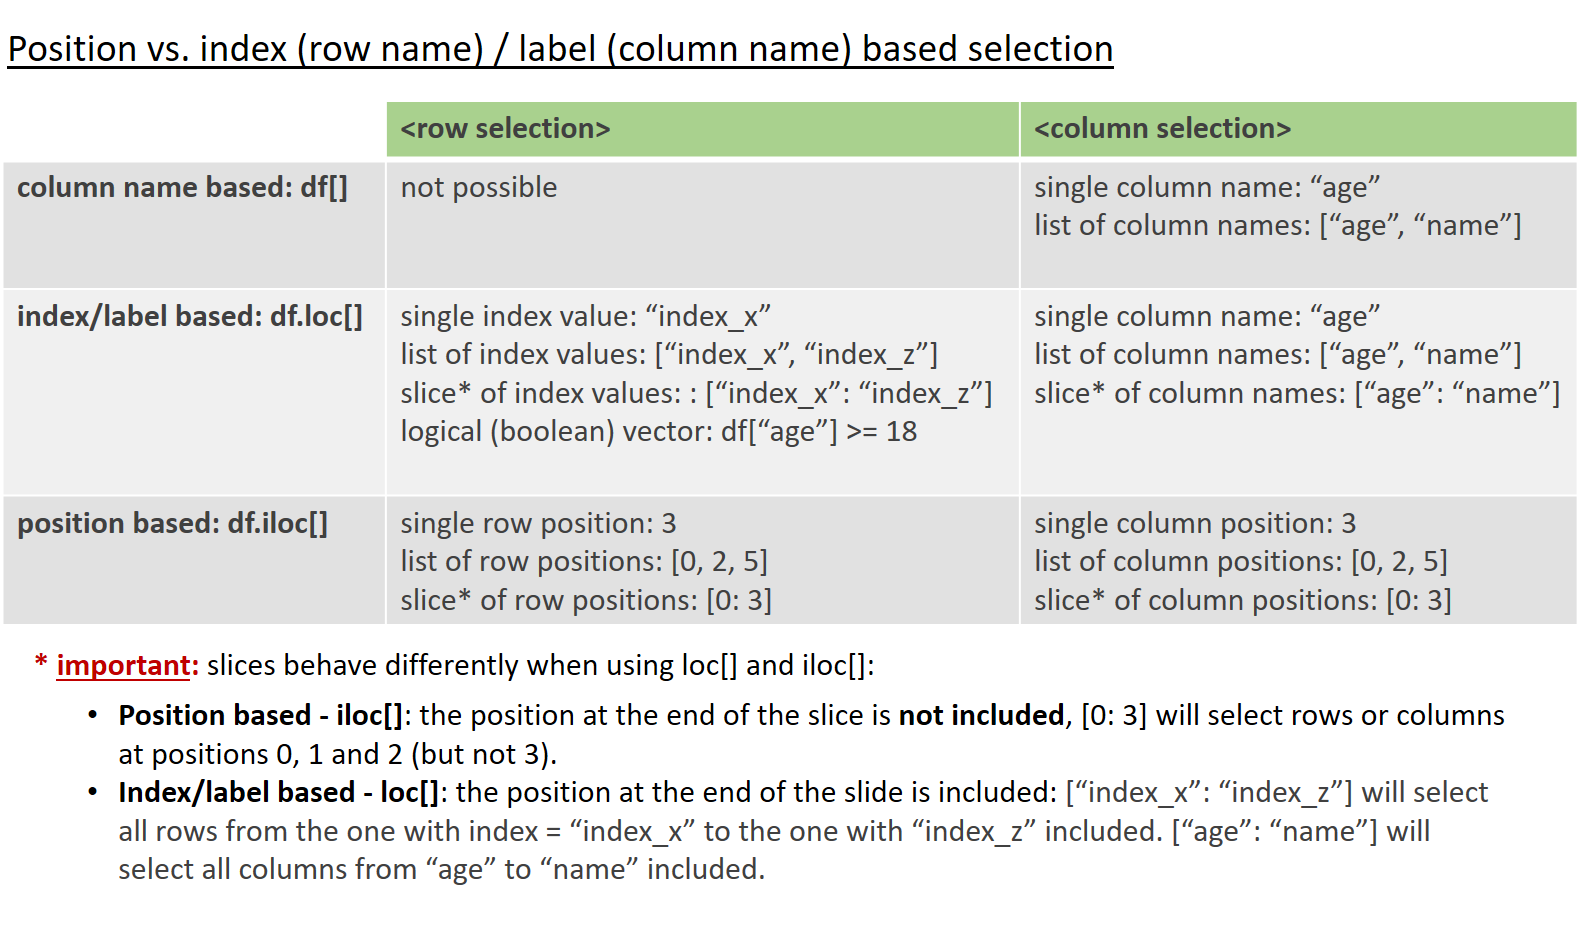

To select all rows/or columns, the symbol **`:`** can be used as row or column selection. It works with both `.loc[]` and `.iloc[]`:
* **`df.loc[<row selection>, :]`** - select all columns.
* **`df.loc[:, <column selection>]`** - select all rows.

> Note: when selecting on rows only (i.e. select all columns), the `df.loc[<row selection>, ]`
  and `df.loc[<row selection>]` syntaxes are also possible. The `:` is not compulsory in that case.

<br>

<div class="alert alert-block alert-warning">
    
**Warning: common pitfall with slicing:** `loc[]` includes the end index, but `iloc[]` does not:

<div>

In [ ]:
df.loc[0:3, :]    # This selects the first 4 rows.

In [ ]:
df.iloc[0:3, :]   # This selects the first 3 rows.

<br>

**Examples:** let's apply what we have learned about `loc[]` and `iloc[]`.

* Select the first 3 rows, and all columns **using `.loc[]`** (index-based selection).

In [ ]:
df.loc[0:2, :]

# Alternatively, these give the same result.
# df.loc[0:2, ]
# df.loc[0:2]

<br>

* Same as above, **using `.iloc[]`** (position-based selection).

In [ ]:
df.iloc[0:3, :]

<div class="alert alert-block alert-warning">
    
> **Important**: in the above example, the selection with `.loc` and `.iloc` look similar
> **because the index values correspond to row positions**.
> 
> To illustrate this, we can try to select  rows from a DataFrame whose Index does not correspond
> to row positions.

```py
tmp = pd.read_csv("data/titanic.csv", index_col=0)
tmp.head()
#tmp.loc[0:2, :]  # Raises a TypeError.
tmp.loc["Bjornstrom-Steffansson Mr. Mauritz Hakan":"Laroche Miss. Simonne Marie Anne Andree", :]
```

> This might also help you understand why the "slicing" with `.loc[]` includes the end position - because
> it's not a slice of a range of numbers, but a selection ranging from one label to another one.

<div>

<br>

* Select the first 3 rows of the columns `Name`, `Age` and `Pclass`.

In [ ]:
df.loc[0:2, ["Name", "Age", "Pclass"]]
df.iloc[0:3, [0, 2, 3]]

<br>

* I am free to select a column several time, in whichever order I wish. This can thus be used to
  **re-order columns** in a DataFrame.

In [ ]:
df.loc[0:2, ["Age", "Pclass", "Name", "Age"]]

<br>

* Some more examples:

In [ ]:
df.loc[ :, "Name":"Fare" ]  # Select all rows, and columns from column "Name" to column "Fare".

In [ ]:
df.iloc[22, [0,2,3]]         # Select a single row (here the 23rd row), and columns 0, 2 and 3.

<br>

**Question:**
* What type of object do we get when selecting a single row/column? You may have noticed that it does not get represented as a list, so what is it?

In [ ]:
# Select a single row:
row_4 = df.iloc[3,]
row_4b = df.loc[3,]
print(type(row_4))
print(type(row_4b))

# Select a single column. Note that when selecting by columns only, ":" must be used to indicate
# that all rows should be selected.
col_age_a = df.loc[:,"Age"]
col_age_b = df.iloc[:,3]
col_age_c = df["Age"]          # When selecting based on columns only, using this syntax is simpler.
print(type(col_age_a))
print(type(col_age_b))


These are pandas **`Series`**. They are the equivalent of `DataFrame`, but **1-dimensional** (so essentially they are a **named vector** of values).  
Their elements can be accessed in quite a similar way:

In [ ]:
print(row_4)
print("\n---\n")
print(row_4[0])   # Access an item by position.
print("\n---\n")
print(row_4.Age)  # Access an item by name.

<br>

<div class="alert alert-block alert-success">
    
### Micro-Exercise 4
* Select all odd rows from the Titanic data frame, as well as the columns "Name", "Age" and "Fare".
* Re-order the columns so that "Age" is first and "Name" is second.

**Hint:** we will see how to perform conditional selections later, but for now you can use the `range()` function to help you with this task.

<br>


<br>
<br>

[Back to ToC](#toc)

## 2.3 Accessing specific rows of a DataFrame - conditional selection <a id='manip.3'></a>

Another, powerful, way of accessing specific part of a DataFrame is by **filtering through a particular condition**. 

<div class="alert alert-block alert-warning">
    
**Important:** Making conditional selections is supported by the **`.loc[]`** indexer, but *not* by `.iloc[]`.

<div>


**Example:** In the Titanic dataset, select all passengers older than 50 years.

In [ ]:
df.loc[df.Age > 50, :]
#df.iloc[df.Age > 50, :]  # Raises a NotImplementedError.

<br>

**Conditional selection** is frequently done my first creating a boolean **mask**, which is then applied to filter the DataFrame:
* A **mask** is a vector of boolean values (`True`/`False`) that indicate whether
  or not a rows satisfies to the defined condition. In the example below, the value of the row in the `Sex`
  column must be equal to `male`.

In [ ]:
mask = df["Sex"] == "male"   # This creates a vector (a pandas Series) of boolean values (True/False).
mask.head()

<br>

Now that the mask is created, we can use it to **filter our `DataFrame`** and keep only those rows corresponding to male passengers.

In [ ]:
print("Number of male passengers:", df.loc[mask, ["Sex","Fare","Survived"]].shape[0])
df.loc[mask, ["Sex","Fare","Survived"]]

<br>

A great method of `Series` containing categorical type data (such as `True`/`False` values only) is **`values_counts()`**.


In [ ]:
mask.value_counts()

<br>

### Combining selection conditions

Selection conditions can be combined to produce more complex selection criteria.  
* Conditions are combined using the **`&`** (logical AND) and **`|`** (logical OR) operators.
* **Important:** each conditions must be surrounded by brackets: `( ... ) & ( ... )`.

<br>

**Example:** select male passengers with a fare > 200.

In [ ]:
mask = (df.Sex == "male") & (df.Fare > 200) 
df.loc[mask, ]

<br>

**Example:** select all people that are either < 25 or women.

In [ ]:
df.loc[(df.Age < 25) | (df.Sex == "female"), :]

> **Reminder: `.iloc[]` does not support boolean results (True/False) for row selection**: it requires row positions. One can hack its way through that by calling the index of a mask, or using the [query method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.query.html)


<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 5
* Select the fare and name of passengers in first class (`Pclass` is `1`) that are less than 18 years old.
* **If you have time:** what fraction of these passengers survived?
<div>


<br>
<br>

[Back to ToC](#toc)

## 2.4 Operations on columns <a id='manip.4'></a>

A great strength of pandas DataFrame is that they allow to use **arithmetic operators directly on columns**:

In [ ]:
# Print the DataFrame for reference.
df.head()

In [ ]:
# Increase the age of all passengers by 1 year.
df.Age = df.Age + 1
df.Age.head()

In [ ]:
df["Age"] -= 1   # Same as df["Age"] = df["Age"] - 1
df.Age.head()

<br>

This syntax is quite powerful, as we can now very easily apply operations across entire columns.  
For instance, consider this data from the 1880 swiss census:
* The `Total` column gives the total number of registered inhabitants in a given town.
* The `Male` columns gives the number of men.

In [ ]:
df_census = pd.read_csv("data/swiss_census_1880.csv")
df_census.loc[:5, ["town name", "Total", "Male"]]

<br>

To get the fraction of men in each town, we can now simply write:

In [ ]:
df_census.Male / df_census.Total

<br>

Better yet - we can very easily assign our result to a **new column**:

In [ ]:
df_census["Male Fraction"] = df_census.Male / df_census.Total
df_census.loc[:, ["town name", "Total", "Male", "Male Fraction"]].head()

<br>

These row value assignment operations can be combined with a selection operation, allowing e.g. to modify the values of certain rows in a DataFrame based on a certain condition.

This is particularly useful when you want to mark some data as NAs for instance.  
Let's imagine that, for some reason, the fares of class 3 passengers (in the Titanic dataset) are not valid. We want to set them to NA:

In [ ]:
df.head()

In [ ]:
# NA is represented using pd.NA
df.loc[df.Pclass==3, 'Fare'] = pd.NA
df.head()

<br>

<div class="alert alert-block alert-success">

### Micro-Exercise 6

Using the Titanic dataset perform the following task:
   
 * Children under the age of 10 get a special discount of 50% on their fare.
  Apply this by dividing by 2 the `Fare` of eligible passenger in the `df` DataFrame.
 * Reminder to load the Titanic dataset: `df = pd.read_csv("data/titanic.csv")`.
</div>

<br>
<br>

### Applying built-in summary functions to DataFrame and Series (columns of a DataFrame)

The pandas `DataFrame` and `Series` objects (reminder: a single column of a `DataFrame` is a `Series`) have a number of built-in methods to compute summary statistics on a per column (or per row) basis.

* **`count()`**: number of non-NA values.
* **`all()`**: returns `True` if all elements are `True` (truthy), `False` otherwise.
* **`sum()`**, **`mean()`**: sum and mean values.
* **`std()`**, **`var()`**: standard deviation and variance values.
* ... and more

By default, the statistics are computed per column. To compute them per row, the `axis=1` argmument must be passed.

<br>

**Examples:**
* Compute the mean and standard deviation of individual columns (pandas `Series`).

In [ ]:
df = pd.read_csv("data/titanic.csv")
print("Average passenger age:", df["Age"].mean())
print("Mean and standard deviation of ticket price:", df.Fare.mean(), df.Fare.std())

<br>

* Compute mean and standard deviation of a DataFrame by column.

In [ ]:
df[["Age", "Fare"]].mean()

In [ ]:
df[["Age", "Fare"]].std()

> Note: to compute these statistics on a per-row basis, the `axis=1` argument must be passed.
>  * Example: `df[["Age", "Fare"]].mean(axis=1)`

<br>

### Applying custom functions on all elements of a column (or more generally on elements of a pandas Series)

As we have just seen, pandas DataFrame allow to easily apply arithmetics on the elements of a column.  
But it is also possible to **apply any custom function to the elements of a column** using the **`.map()`** method.

* General syntax: `df[<column name>].map(<function to apply>)`

> Note: the `.map()` method applies a given function to each single element of a column
> (or more generally of a pandas Series).  
>  * To apply a function to a DataFrame by columns the **`.apply()`** method should be used instead.
>  * To apply a function to individual elements of an entire DataFrame, the **`.applymap()`** method
>    can be used.
>  * **Warning:** the `.apply()` method also exists for Series, where it applies the specified function
>    to each element of the Series (just like `.map()`). The behavior of `.apply()` is therefore different
>    between DataFrame and Series.
>  
>  See the **Additional Material** section at the end of this document for more details on the
>  `.apply()` method of DataFrame.

<br>

**Example:** using `.map()` and `.applymap()` to apply a custom function to all elements of a `Series` or `DataFrame`.

In [ ]:
def silly_function(x):
    """Return "even" if x is divisible by 2, otherwise return "odd"."""
    if x % 2 == 0:
        return "even"
    return "odd"

for x in range(5):
    print(f"{x} -> {silly_function(x)}")

Let's now apply our `silly_function` to (each element of) the `Age` column in the Titanic dataframe.  
> Note: this does not modify the content of the DataFrame, but returns a pandas Series object.

In [ ]:
df = pd.read_csv("data/titanic.csv")
df.Age.map(silly_function).head()

<br>

To apply our method to all elements of a DataFrame, we can use the **`.applymap()`** method.

In [ ]:
df[["Age", "Fare", "Pclass"]].applymap(silly_function).head()

<br>

**Example 2:** in the Titanic dataset, expand the abbreviated value of the port of embarkation to its full value.

In [ ]:
# Let's print the data set.
df = pd.read_csv("data/titanic.csv")
df.head()

In [ ]:
# Define a custom function that expands the port of embarkation abbreviation.
def expand_port_of_embarkation(abbreviated_value):
    """Converts the abbreviated port of embarkation to its full name."""
    abbreviations = {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
    return abbreviations.get(abbreviated_value, None) if len(str(abbreviated_value)) == 1 else abbreviated_value

# Apply the custom function to each value of the "Embarked" column.
df["Embarked"] = df["Embarked"].map(expand_port_of_embarkation)
df.head()

An even better solution in this case, is to use the ability of **`.map()`** to take a **dictionary as input argument** (instead of a function), and pass the mapping dictionary to `.map()` directly rather than writing our own `expand_port_of_embarkation()` function (which will be less efficient).

In [ ]:
df = pd.read_csv("data/titanic.csv")
df["Embarked"] = df["Embarked"].map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})
df.head()

<div class="alert alert-block alert-warning">
    
#### Vectorization vs. loops

When processing data in a `DataFrame`, you should **avoid using loops** as much as possible.  
Instead, use the pandas vectorization functions: `.map()`, `.apply()`, `.applymap()`.
    
* Here is an example of a simple benchmark, where the **vectorized version is 100x faster** than using a loop.  
  Note: `%timeit` is a Jupyter "magic function" that allows to benchmark a line of code.

```py
# Define a function that updates a DataFrame using a loop -> an example of what NOT TO DO.
def loop_method(df):
    abbreviations = {"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}
    for index, value in enumerate(df["Embarked"]):
        df.loc[index, "Embarked"] = abbreviations.get(value, None)

# Define a function that does the same `loop_method`, but using vectorization.
def vectorized_method(df):
    df.Embarked = df.Embarked.map({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"})

# Let's benchmark our two implementations.
df = pd.read_csv("data/titanic.csv")
%timeit loop_method(df)               # -> 60.3 ms ± 1.38 ms per loop
df = pd.read_csv("data/titanic.csv")
%timeit vectorized_method(df)         # -> 534 µs ± 23.2 µs per loop. More than 100x faster!
```

<div>

<br>

<div class="alert alert-block alert-info">
    
### Additional material: copy or not copy?

What happens if we select a subset of a DataFrame and modify it? Does the original data stay the same?
    
<div>

In [ ]:
df = pd.read_table("data/titanic.csv", sep=",")
df.head()

In [ ]:
df.loc[df.Sex == "male", "Age"] = 999
df.head()

<div class="alert alert-block alert-info">
    
In the above example, pandas changes the values of the `Age` column in the original `DataFrame` object.

In general, `pandas` avoids doing copies when it can... but let's try another example:

<div>

In [ ]:
# Assign the subset to a new variable.
df_male = df.loc[df.Sex == 'male', :]

In [ ]:
# Setting the age to 888 in the subset dataframe of males:
df_male.Age = 888

<br>

<div class="alert alert-block alert-info">

What's this? We get a warning!
* As can be seen below, the `Age` value for males has been modified in the `df_male` DataFrame, but not in the
  original `df` DataFrame.

<div>

In [ ]:
df_male.head(3)

In [ ]:
df.head()

<div class="alert alert-block alert-info">

In this case, the change is made to `df_male` only and not to the original DataFrame `df`.

Sadly, it is not always that easy to get when you get a **view** or a **copy**.

<br>

![image.png](img/view_copy.png)

<br>

 * **View:** pointer to the original DataFrame.
 * **Copy:** new DataFrame. Modifying a copy leaves the original data untouched.

In general, **using `.loc[]` should return a view**, however that also depends on the evaluation order of some of the performed operations.

To make sure to get a copy, it is recommended to use the **`copy()`** method of DataFrame:

<div>

In [ ]:
# Explicitly create a copy of the DataFrame returned by .loc[]
df_male = df.loc[df.Sex == 'male', : ].copy()

# Now we don't get a warning anymore:
df_male.Age = 888
df_male.head(3)

<div class="alert alert-block alert-info">
    
This issue is quite complex, but as you are likely to encounter this warning at some point, it is better to have the cat out of the bag now. Here is a recommended reading if you wish to get a more [in-depth explanation of view vs. copy](https://www.dataquest.io/blog/settingwithcopywarning).

<div>

<br>
<br>

[Back to ToC](#toc)

## 2.5 Adding, removing and combining columns and rows <a id='manip.5'></a>

We have already seen how to create a new column and apply functions to columns.

**Example:** apply a random discount to the passenger ticket fares in the Titanic dataset.

In [ ]:
import numpy.random as rd
import pandas as pd

# (Re)load the Titanic dataset.
df = pd.read_csv("data/titanic.csv")

df['Discount'] = rd.random(df.shape[0])   # Reminder: .shape[0] returns the row count of a DataFrame.
df['Discounted_Fare'] = ( 1 - df.Discount ) * df.Fare
df.head()

<br>

### Removing columns and rows

* **`df.drop()`** is used to remove columns or rows of a DataFrame.
* Use the **`columns`** keyword argument to delete columns: `df.drop(columns="column_to_delete")`.
* Use the **`index`** keyword argument to delete rows: `df.drop(index="row_to_delete")`.
* Alternatively, specify the column/row names and use `axis=0` (delete rows) or `axis=1` (delete columns).
* The optional **`inplace`** argument specifies whether the original DataFrame should be modified 
  (`inplace=True`), or if a copy should be returned (`inplace=False`). Defaults to `False`.

In [ ]:
col_to_delete = 'Discounted_Fare'
df2 = df.drop(columns=col_to_delete)            # Note: inplace defaults to False, so this line creates a copy.

print(f"Is '{col_to_delete}' in df : {col_to_delete in df.columns}")
print(f"Is '{col_to_delete}' in df2 : {col_to_delete in df2.columns}")

<br>

* Delete the column from the original DataFrame with **`inplace=True`**:

In [ ]:
df2 = df.drop(columns=col_to_delete, inplace=True) 

print(f"Is '{col_to_delete}' in df : {col_to_delete in df.columns}")

# with inplace=True, the .drop() method returns None.
print("df2 is", df2)


<br>

<div class="alert alert-block alert-info">

### Additional material: more ways to add rows to a DataFrame

Several options exist to add or edit rows of a DataFrame:

* As we have already seen, the easiest way is to assign a sequence of values to a new row
  (or an existing one to overwrite it).  
  **Important:** the sequence must have the same length as there are columns in the DataFrame.

<div>

In [ ]:
df = pd.read_csv("data/titanic.csv")

# Add a new row to the DataFrame.
df.loc[len(df),:] = ["Bob", "male", 27, 3, 1, 0, 10, "S"]
df.tail()

<br>

<div class="alert alert-block alert-info">
    
* A row can also be added by assigning a `Series` to a new row (or an exiting row, to overwrite it).  
  **Note:** in this case, missing fields are allowed.

<div>

In [ ]:
new_passenger = pd.Series({"Name": "Alice", "Sex": "female", "Fare": 95, "Embarked": "C"})
df.loc[len(df),:] = new_passenger
df.tail()

<br>

<div class="alert alert-block alert-info">

* Concatenate a DataFrame with another `DataFrame` or `Series` using  **`pd.concat()`**, which takes a list of `DataFrame` or `Series`:

<div>

In [ ]:
df = pd.concat(
    [
        df,
        pd.DataFrame(
            {
                "Name": "Chuck Norris",
                "Sex": "fluid",
                "Age": pd.NA,
                "Pclass": 2,
                "Survived": 2,
                "Family": pd.NA,
                "Fare": 0,
                "Embarked": "S"
            },
        index=[df.shape[0]])
    ]
)
df.tail()

<div class="alert alert-block alert-info">
    
* **Adding a row at specific location** is possible, if a little hacky as you first have to add the row at the
  end of the DataFrame, and then re-order the rows.

<div>

In [ ]:
df.loc[890.5,:] = ["Bob Jr.", "male", 2, 3, 1, 1, 10, "S"]
df.sort_index(inplace=True)
df.reset_index(inplace=True, drop=True)  # With drop=True, the index is reset to the default index values.
df.tail()

# Alternatively: df = df.sort_index().reset_index(drop=True)

<br>
<br>
<br>

[Back to ToC](#toc)


# 3. Writing DataFrames to disk <a id='writing'></a>
------------------------------------------------------------

Writing a DataFrame to disk is very similar to reading it from disk.  
There are several functions depending on the format in which the data should be stored. Here are some examples:
* **`to_csv()`**: write a DataFrame as comma-separated file, or any other separator-delimited format such as
  tab-delimited. 
* **`to_excel()`**: write a DataFrame in Excel format.
* **`to_html()`**: write a DataFrame in HTML format.
* See [here for more writer functions...](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html).

These functions take similar arguments as the reader functions. E.g. when using the `to_csv()` writer functions, some useful arguments are:

* **`sep`**: the type of delimiter to use. By default, `sep=","`.
  To write a tab-delimited file e.g., one would set `sep="\t"`.
* **`header=None`**: to not include the header in the exported file.

<br>

**Example:** write the `df` DataFrame to a file named `my_data.csv` in the current working directory.

In [ ]:
df.to_csv('my_data.csv')

<br>
<br>

<div class="alert alert-block alert-success">

## Exercise 1.1 - data manipulation

Exercises are located in the dedicated notebook `exercises_course1.ipynb`.

</div>


<br>
<br>
<br>

[Back to ToC](#toc)

# Additional material - tips and tricks <a id='annex'></a>
---------------------------

Here is a collection of handy tricks that don't belong anywhere specific but are nice to know.  
This section will not be covered in the course, but you can read it on your own if you are interested.

<br>

## Annex 1 - Applying custom functions to a DataFrame  <a id='annex.1'></a>

As we have seen in this Notebook, `DataFrame` has a number of built-in methods to apply commonly used functions to an entire data frame. For instance, `.count()` or `.mean()` can be applied per-column or per-row to a data frame.

But it is also possible to apply **any custom function** on a per-row/column basis, by using the **`.apply()`** method.  
The arguments of `.apply(func, axis=0)` are as follows:
* `func`: the function to apply. This function must accept a sequence of values as its sole input.
* `axis`: by default, `axis=0` which means to apply the function on a per-column. To apply the function
  on a per-row basis, pass `axis=1`.

<br>

**Warning:** the `apply()` function exists both for DataFrames and Series, but behaves differently:
* On a DataFrame, `.apply()` applies the specified function on an entire column (`axis=0`) or row (`axis=1`).
* On a Series, `.apply()` applies the specified function to each element of the Series, similarly to what
  the `.map()` method does.
  
<br>
<br>

<br>

**Example:** apply a custom function to multiple columns of a DataFrame. Here the custom function computes the sum of squares of the values passed to it.


In [ ]:
def sum_of_squares(seq):
    """Computes the sum of squares of the input values,
    ignoring non-numeric values.
    """
    return sum(x**2 for x in seq if str(x).isdigit())
    
# Test of the sum_of_squares() function on dummy data:
print("This should be 14:", sum_of_squares([1,2,3, "foo"]))
print("This should be 0:", sum_of_squares(("foo", "bar")))

In [ ]:
# Apply our custom function by column: this returns the sum of squares of each column
# (non-numeric columns get a value of 0).
df.apply(sum_of_squares, axis=0)

In [ ]:
# Apply custom function by row: this returns the sum of squares of each row,
# ignoring non-numeric values.
df.apply(sum_of_squares, axis=1)

<br>

**Reminder:** the **`axis`** argument also applies to DataFrame "built-in" methods, such as `.max()` (get the max value per column or row), `.count()` (count the number of non-NA values), etc...  
* `axis=0`: apply the operation on columns (this is the default value).
* `axis=1`: apply the operation on rows.

<br>

**Example:** finding the maximum value in each column. Note that we here explicitly pass `axis=0` for the purpose of demonstration, but in principle since `axis=0` is the default, we could simply omit the argument.

In [ ]:
df.max(axis=0).head()

Let's now find the max value in each row (in this case for each gene), over all columns (samples):

In [ ]:
df.max(axis=1).head()

<br>

Maybe what we want is not the maximum value but the index at which it is found. We can get this using the **`.idxmax()`** method.

In [ ]:
df.idxmax(axis=1).head()

<br>
<br>

## Annex 2 - Sorting operations on dataframes  <a id='annex.2'></a>

DataFrames can be sorted on one or more column(s) using **`sort_values()`**, or on their index with **`sort_index()`**:

Both functions take the optional arguments:
* `ascending=True`: sort in ascending or descending order.
* `inplace=False`: if `True` the original DataFrame is sorted, if `False` a sorted copy of the DataFrame is
  returned (this is the default).

<br>

**Examples:**

In [ ]:
# Load dataset with Unique Molecular Identifier (UMI) counts per gene.
df = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)
df.head()

<br>

Sort the `df` DataFrame in descending order of the first column.  
Note: to avoid having to pass the explicit column name, we use `df.columns[0]`.

In [ ]:
df = df.sort_values(df.columns[0], ascending=False)
df.head()

<br>

Sort the `df` DataFrame in descending order of the first 3 columns.

In [ ]:
df = df.sort_values(list(df.columns[0:3]), ascending=False)
df.head(10)

<br>

Sort the DataFrame by index values using **`sort_index()`**:

In [ ]:
df.sort_index(ascending=True).head()

<br>
<br>

## Annex 3 - Merge and join DataFrames  <a id='annex.3'></a>

The **[`merge()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html)** and **[`join()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html)** methods allow to combine DataFrames, linking their rows based on a common column (also referred to as a **key**).

To illustrate these 2 methods, let's create 2 DataFrames that we can merge.
> Note: this also illustrates how **a dataframe can be constructed from a dictionary** data structure.
  The dictionary keys are treated as column names, and the list of values associated with a key is
  treated as list of elements in the corresponding column. Note that all columns should have the same
  number of elements (or a single element, in which case all rows of the column are assigned this same
  element).  
  If no index is specified, pandas uses its default indexing, i.e. row positions.

In [ ]:
df1 = pd.DataFrame(
    {
        "key": ["b", "b", "a", "c", "a", "a", "b"], 
        "data1": range(7)
    }
)
df1

In [ ]:
df2 = pd.DataFrame({
    "key": ["a", "b", "d"], 
    "data2": range(3)
})
df2

<br>

Let's now merge the two data frames, with the default application of the `merge()` method:

In [ ]:
pd.merge(df1, df2)

How has python interpreted our call to `merge()`?

1. It has assumed that we want to merge on the basis of the common `key` column.
2. It has identified the values of `key` which occur in both dataframes.
3. It has generated a dataframe with all combinations of rows from dataframes 1 and 2 that are 
   associated with a particular `key` value.

We can be more precise by specifying how to merge the dataframes, using the **`on`** option:

In [ ]:
pd.merge(df1, df2, on="key")

By default, merge performs an "inner" operation, taking the intersection of the key sets. However, we can specify the way we want to merge by passing `"outer"`, `"left"`, `"right"` to the **`how`** argument. This determines which set of keys to consider (the union of the two sets, all of those that occur in df1, all of those that occur in df2). Missing values show up as `NaN`.

In [ ]:
pd.merge(df1, df2, on="key", how="outer")

<br>

Merging can also be done based on the index values. Let's illustrate this using another dataset :

In [ ]:
df = pd.read_table('data/pbmc_data.countMatrix.50.txt.zip', sep=" ", index_col=0)
df.head()

In [ ]:
# We split the columns based on whether or not they start with "AAAT".
mask = df.columns.str.startswith("AAAT")
AAAT_cols = df.columns[ mask ]
nonAAAT_cols = df.columns[ ~mask ]

df_A = df[AAAT_cols]
df_B = df[nonAAAT_cols]

df_A.head()

In [ ]:
df_B.head()

Let's create two data frames, one containing the data for the WT and the other for the KO:

Let's merge these frames based on the index:

In [ ]:
merged_df = pd.merge(df_A, df_B, left_index=True, right_index=True)
merged_df.head()

<br>

## Annex 4 - Wide and long format <a id='annex.4'></a>

Most dataset are usually stored in so-called **wide** format, because it is more efficient and avoids duplication of information in the table. However, it can sometimes be interesting to go from wide to long or long to wide, because some operations are easier on one format or the other.

**Wide format:**

| Id     | mol1   | mol2    |
| ------ |:------:| -------:|
| a      | 1.0    | 10.0    |
| b      | 2.0    |   20.0  |
| c      | 3.0    |    30.0 |

**Long format:**

| Id     | Value  | Attr    |
| ------ |:------:| -------:|
| a      | 1.0    | mol1    |
| a      | 10.0   | mol2    |
| b      | 2.0    | mol1    |
| b      | 20.0   | mol2    |
| c      | 3.0    | mol1    |
| c      | 30.0   | mol2    |



In [ ]:
# Data in wide format:
df.head()

<br>

The conversion to the **long** format is done using the **`.melt()`** method of DataFrame.

In [ ]:
df["gene"] = df.index
df_long = pd.melt(df, id_vars=["gene"])  # Convert to long format, with gene as identifiers 
df_long.head()

<br>

Having the data in long format now allows us to do this, which was a bit difficult otherwise:  
**Note:** running the cell below can take a few seconds (notice the "[ \* ]" to the left of the Jupyter Notebook cell, indicating that the cell is computing).

In [ ]:
import numpy as np
import seaborn as sns

df_long["logVal"] = np.log10(10**0 + df_long["value"])

g = sns.catplot(
    x="logVal", y="variable",
    orient="horizontal" , data=df_long, 
    kind="bar", aspect=2, height=7
)